<a href="https://colab.research.google.com/github/ben300694/jupyter-TDA/blob/main/15_min_intro_to_persistence_homology_and_application_to_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15 min Intro to Persistent Homology
### <a href="https://ben300694.github.io/" target="_blank">Benjamin Matthias Ruppik</a>, Max-Planck Institute for Mathematics, Bonn

## Filtrations of topological spaces


### Motivating example: Sublevel filtrations

A lot of topological spaces $X$ come with a natural *filtration*,
an increasing union of subspaces $X_{i}$,
i.e. for $i < j$ in the index set we have $X_{i} \subseteq X_{j}$.

Here is an example of a topological space $X$
(with a Morse function $f \colon X \rightarrow \mathbb{R}$) ...

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/topological_space_Morse_position.jpg?raw=1" width=400 title="Surface of genus 2 in Morse position with 3 minima, 7 saddles, 2 maxima"/>

... and the *sublevel set filtration*
$X_{t} = f^{-1}((-\infty, t])$:

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/Morse_sublevel_filtration.jpg?raw=1" width=600 title="Surface of genus 2 sublevel filtration"/>

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/Morse_complete_sublevel_filration.png?raw=1" width=1000 title="Surface of genus 2 sublevel filtration 8 movie frames"/>

### Persistent homology

The $i$-dimensional homology group of a space measures $i$-dimensional holes (or cavities).

\begin{equation}
H_{i}(X) = i\textrm{-dim cycles modulo boundaries}
\end{equation}

Here are some examples of 1-dimensional homology classes:

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/Morse_homology_classes.png?raw=1" width=1000 title="Surface of genus 2 sublevel filtration 8 movie frames with some homology classes drawn in."/>

persist = "to stick around for a long time"

Example where a first homology class persists from its appearance until the end in <span style="color:red">red</span>.

Example where a first homology class appears but soon thereafter is canceled at a maximum in <span style="color:green">green</span>.

**Slogan: Persistent homology measures non-trivial cycles which can be detected in significant parts of the filtrations.**

## Toy data and Simplex trees

### Defining a simplicial complex with filtration


<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/toy_simplicial_complex.jpg?raw=1" width=800 title="Toy simplicial complex"/>

In [2]:
!pip install gudhi

     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.2/3.1 MB 6.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/3.1 MB 16.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 3.1/3.1 MB 23.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import gudhi
import numpy as np
import networkx
from pylab import *

In [5]:
# Toy example working with the simplex tree

toy_st = gudhi.SimplexTree()

# 0-simplices in filtration level 0.0
for i in range(0, 5):
    toy_st.insert([i], 0.0)

# 1-simplices in filtration level 1.0
toy_st.insert([0, 1], 1.0)
toy_st.insert([0, 2], 1.0)
toy_st.insert([1, 3], 1.0)
toy_st.insert([2, 3], 1.0)

# additional 1-simplex in filtration level 2.0
toy_st.insert([1, 2], 2.0)

# last 1-simplex and 2-simplex
toy_st.insert([3, 4], 3.0)
toy_st.insert([0, 1, 2], 3.0)

for simplex in toy_st.get_filtration():
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([1, 2], 2.0)
([0, 1, 2], 3.0)
([3, 4], 3.0)


<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/toy_simplicial_complex_homology.jpg?raw=1" width=800 title="Toy simplicial complex with homology classes"/>

[(1, (1.0, inf)), (1, (2.0, 3.0)), (0, (0.0, inf)), (0, (0.0, 3.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


/opt/conda/envs/testenv/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence barcode'}>

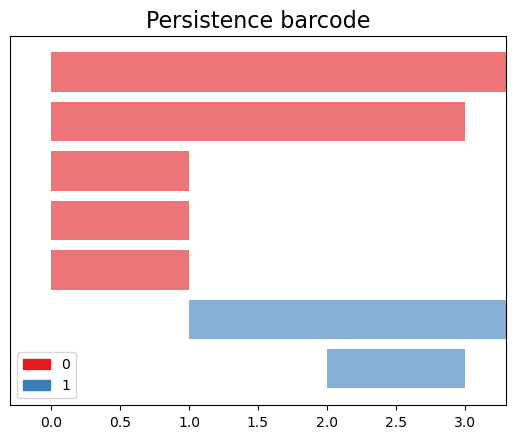

In [7]:
toy_bar = toy_st.persistence(min_persistence=0.0, persistence_dim_max=True)
print(toy_bar)

gudhi.plot_persistence_barcode(persistence=toy_bar, legend=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

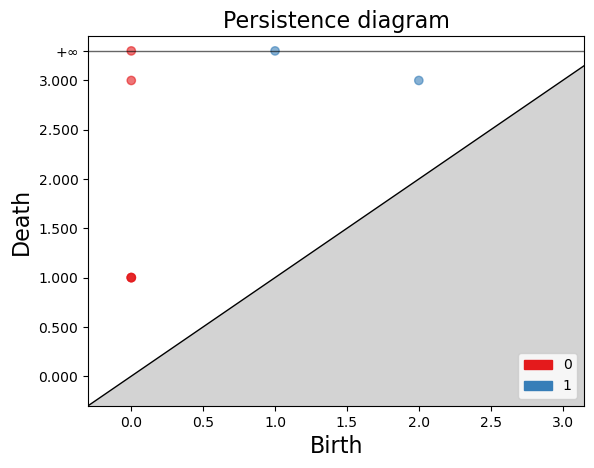

In [9]:
gudhi.plot_persistence_diagram(persistence=toy_bar, legend=True)

## Persistent homology applied to "real data": Clique complex of a graph

Repository of various graphs: https://networkrepository.com/index.php

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/network_repository_website.png?raw=1" width=700 title="Screenshot of the Network Repositoy website"/>

Let us take a graph representing a social network:

Quote: "Data collected about Facebook pages (November 2017).
These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them."


In [11]:
def simplex_graph_from_csv(path_to_csv, delimiter=','):
    """
    Input: Path to csv file with list of edges
    
    Output: 1-skeleton of simplex tree
    """
    # Create networkx graph from edge list
    dataframe = pd.read_csv(path_to_csv, names=['A', 'B'])
    print(dataframe)
    G_nx = networkx.from_pandas_edgelist(dataframe, 'A', 'B')
    print(G_nx)
    
    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    for v in G_nx.nodes():
        st.insert([v], 0.0)
    # Insert edges into simplex tree
    for e in G_nx.edges():
        st.insert(e, 1.0)

    return st

        A    B
0       0  276
1       0   58
2       0  132
3       0  603
4       0  398
...   ...  ...
2097  597  611
2098  601  603
2099  601  616
2100  603  616
2101  311  613

[2102 rows x 2 columns]
Graph with 620 nodes and 2102 edges


<Axes: title={'center': 'Persistence barcode'}>

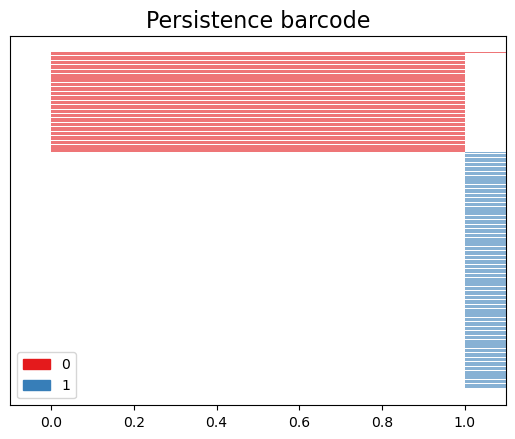

In [12]:
# Import the real data graph and build 1-complex

# path_to_fb_pages_food_csv = './datasets/fb-pages-food/fb-pages-food.edges'
path_to_fb_pages_food_csv = \
  'https://raw.githubusercontent.com/ben300694/jupyter-TDA/main/datasets/fb-pages-food/fb-pages-food.edges'

fb_pages_food_st = simplex_graph_from_csv(path_to_fb_pages_food_csv)

#for simplex in fb_pages_food_st.get_filtration():
#    print(simplex)

fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
# print(fb_pages_food_bar)

gudhi.plot_persistence_barcode(fb_pages_food_bar, legend=True, max_intervals=0)

Clique complex of a graph:
We add a $k$-simplex for any clique of $(k+1)$-many vertices in the graph.

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/graph_cliques_examples.jpg?raw=1" width=700 title="Screenshot of the Network Repositoy website"/>

This is also known as the flag complex of a graph.

The clique complex of a graph $G$ can also be interpreted as a Vietoris–Rips complex for the metric space 
where the points are vertices of $G$ and and the distances are the lengths of the shortest paths in $G$.


In [14]:
def simplex_2_complex_from_csv(path_to_csv, delimiter=','):
    """
    Input: Path to csv file with list of edges
    
    Output: 2-skeleton of simplex tree for clique complex
    """
    # Create networkx graph from edge list
    dataframe = pd.read_csv(path_to_csv, names=['A', 'B'])
    print(dataframe)
    G_nx = networkx.from_pandas_edgelist(dataframe, 'A', 'B')
    print(G_nx)

    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    for v in G_nx.nodes():
        st.insert([v], 0.0)
    # Insert edges into simplex tree
    for e in G_nx.edges():
        st.insert(e, 1.0)
        
    # Inserting cliques with 3 members
    for clq in networkx.clique.find_cliques(G_nx):
        if len(clq) == 3:
            print('Adding clique ', clq)
            st.insert(clq, 2.0)
        
    return st

In [15]:
# Import the real data graph and build 2-complex

# path_to_fb_pages_food_csv = './datasets/fb-pages-food/fb-pages-food.edges'
path_to_fb_pages_food_csv = \
  'https://raw.githubusercontent.com/ben300694/jupyter-TDA/main/datasets/fb-pages-food/fb-pages-food.edges'

fb_pages_food_st = simplex_2_complex_from_csv(path_to_fb_pages_food_csv)

#for simplex in fb_pages_food_st.get_filtration():
#    print(simplex)

        A    B
0       0  276
1       0   58
2       0  132
3       0  603
4       0  398
...   ...  ...
2097  597  611
2098  601  603
2099  601  616
2100  603  616
2101  311  613

[2102 rows x 2 columns]
Graph with 620 nodes and 2102 edges
Adding clique  [0, 603, 58]
Adding clique  [3, 352, 40]
Adding clique  [3, 65, 608]
Adding clique  [3, 65, 185]
Adding clique  [3, 65, 450]
Adding clique  [3, 65, 299]
Adding clique  [3, 484, 40]
Adding clique  [3, 377, 608]
Adding clique  [3, 377, 185]
Adding clique  [3, 377, 450]
Adding clique  [3, 377, 299]
Adding clique  [8, 73, 369]
Adding clique  [17, 65, 608]
Adding clique  [17, 65, 185]
Adding clique  [17, 65, 450]
Adding clique  [17, 65, 299]
Adding clique  [21, 329, 441]
Adding clique  [21, 516, 334]
Adding clique  [22, 187, 104]
Adding clique  [23, 257, 157]
Adding clique  [23, 434, 58]
Adding clique  [23, 157, 288]
Adding clique  [31, 449, 193]
Adding clique  [31, 193, 41]
Adding clique  [31, 193, 285]
Adding clique  [31, 518, 327]
Addin

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

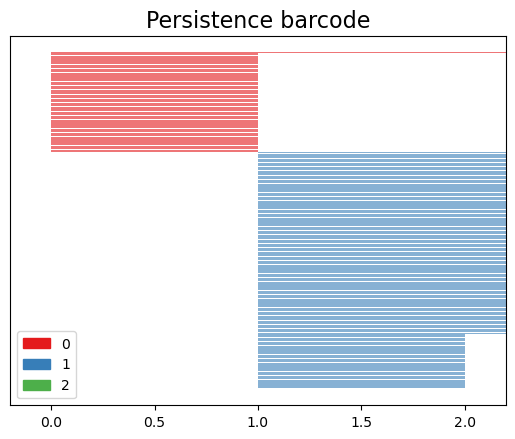

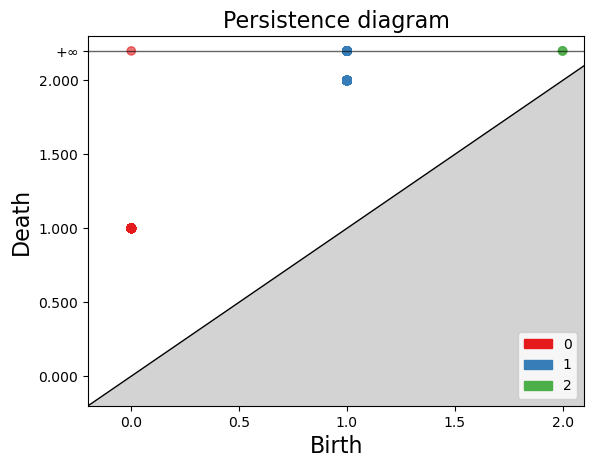

In [17]:
fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
#print(fb_pages_food_bar)

gudhi.plot_persistence_barcode(fb_pages_food_bar, legend=True, max_intervals=0)

gudhi.plot_persistence_diagram(fb_pages_food_bar, legend=True, max_intervals=0)

This is still a little boring, since homology classes only appear
at integral time steps.

## The weight rank clique filtration

Quoting from Nguyen, Aktas, Akbas: Bot Detection on Social Networks Using Persistent Homology:


"Instead of working the clique complex of the whole graph, we can
induce a family of simplicial complexes out of the clique complex of the subgraphs of G and track how
homology changes in this family"

"One of the popular filtration methods defined on undirected weighted networks is called
weight rank clique filtration. This filtration, first defined in [22], uses weights as threshold values
δ. The authors first rank the edge weights from wmin to wmax (it can also be done in other direction,
from wmax to wmin as well) and let the parameter increase from wmin to wmax. At each step δ, they just
consider the thresholded subgraph Gδ ⊆ G that is the subgraph with edges of weight larger than δ.
Then, they create the clique complex of Gδ
to obtain the filtration."

        A    B
0       0  276
1       0   58
2       0  132
3       0  603
4       0  398
...   ...  ...
2097  597  611
2098  601  603
2099  601  616
2100  603  616
2101  311  613

[2102 rows x 2 columns]
Imported graph with 620 nodes and 2102 edges.


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

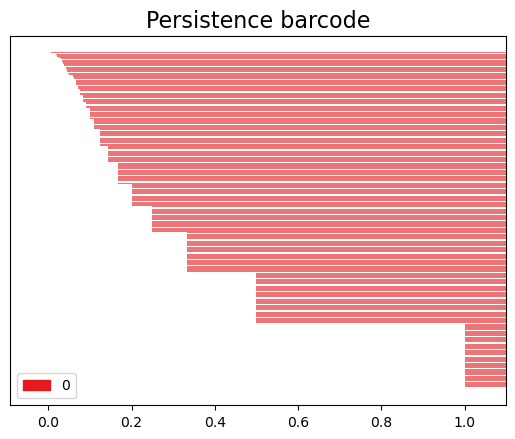

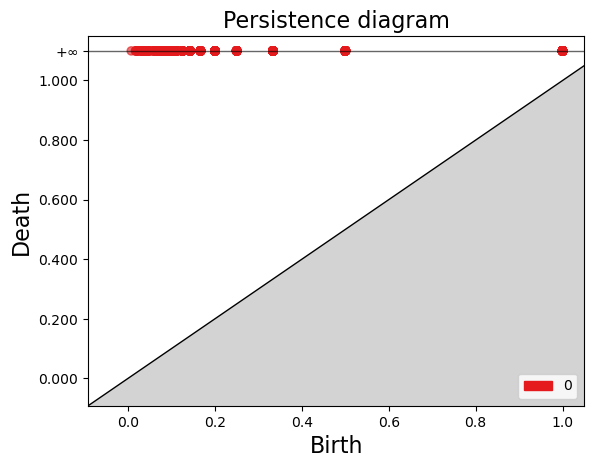

In [19]:
# Import the real data graph and build weighted 1-complex

# path_to_fb_pages_food_csv = './datasets/fb-pages-food/fb-pages-food.edges'
path_to_fb_pages_food_csv = \
  'https://raw.githubusercontent.com/ben300694/jupyter-TDA/main/datasets/fb-pages-food/fb-pages-food.edges'

# Create networkx graph from edge list
dataframe = pd.read_csv(path_to_fb_pages_food_csv, names=['A', 'B'])
print(dataframe)
G_nx = networkx.from_pandas_edgelist(dataframe, 'A', 'B')
print("Imported graph with", G_nx.number_of_nodes(), "nodes and", G_nx.number_of_edges(), "edges.")

# Create simplex tree
fb_pages_food_st = gudhi.SimplexTree()

# Insert vertices into simplex tree
for v in G_nx.nodes():
    if G_nx.degree(v) != 0:
        fb_pages_food_st.insert([v], 1/(G_nx.degree(v)))


fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
# print(fb_pages_food_bar)

gudhi.plot_persistence_barcode(fb_pages_food_bar, legend=True, max_intervals=0)
gudhi.plot_persistence_diagram(fb_pages_food_bar, legend=True, max_intervals=0)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

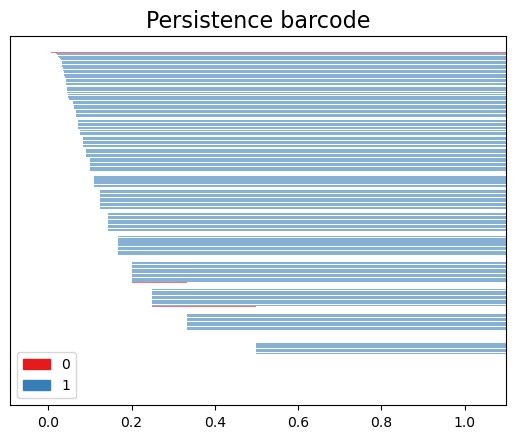

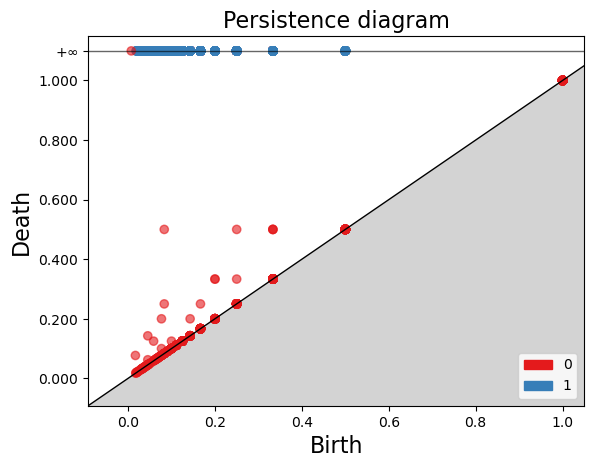

In [21]:
#Insert edges into simplex tree with filtration value the maximum of its endpoints
for e in G_nx.edges():
    fb_pages_food_st.insert(e, max(fb_pages_food_st.filtration([e[0]]), fb_pages_food_st.filtration([e[1]])))

fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
    
gudhi.plot_persistence_barcode(fb_pages_food_bar, legend=True, max_intervals=0)
gudhi.plot_persistence_diagram(fb_pages_food_bar, legend=True, max_intervals=0)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

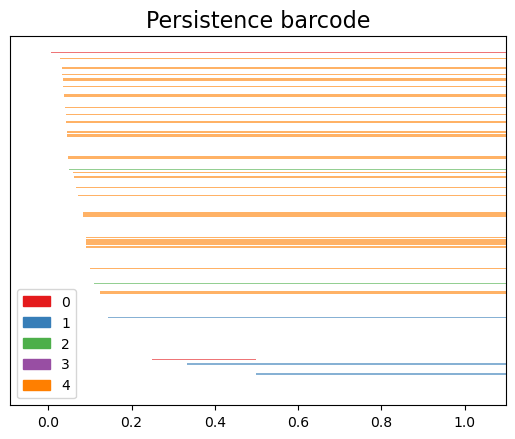

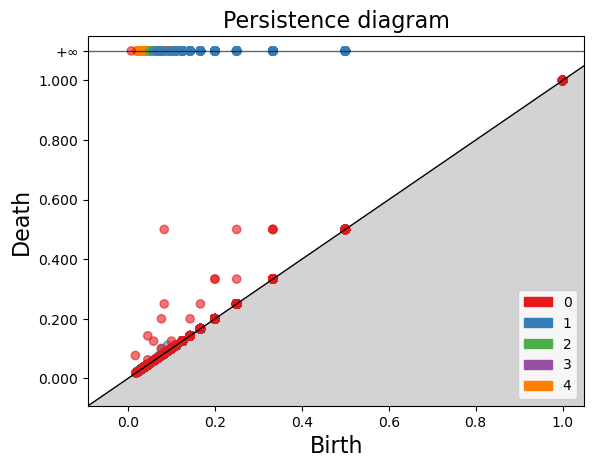

In [23]:
# Expand simplex tree by constructing flag complex up to max_dim,
# the filtration of a simplex is the maximal filtration index of its vertices
max_dim = 4
fb_pages_food_st.expansion(max_dim)

fb_pages_food_bar = fb_pages_food_st.persistence(min_persistence=-1.0, persistence_dim_max=True)
    
gudhi.plot_persistence_barcode(fb_pages_food_bar, legend=True, max_intervals=0)
gudhi.plot_persistence_diagram(fb_pages_food_bar, legend=True, max_intervals=0)

In [25]:
def simplex_graph_with_weight_rank_clique_filtration_from_csv(path_to_csv, 
                                                              max_dim=4):
    """
    Input: Path to csv file with list of edges
    
    Output: Build the clique complex of the graph
    where the vertices are weighted by the reciprocal of their degree
    """
    # Create networkx graph from edge list
    dataframe = pd.read_csv(path_to_csv, names=['A', 'B'])
    G_nx = networkx.from_pandas_edgelist(dataframe, 'A', 'B')
    print("Imported graph with", 
          G_nx.number_of_nodes(), "nodes and",
          G_nx.number_of_edges(), "edges.")

    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    for v in G_nx.nodes():
        if G_nx.degree(v) != 0:
            st.insert([v], 1/(G_nx.degree(v)))
    
    # Insert edges into simplex tree with
    # filtration value the maximum of its endpoints
    for e in G_nx.edges():
        st.insert(e, max(st.filtration([e[0]]), st.filtration([e[1]])))

    
    # Expand simplex tree by constructing flag complex up to max_dim,
    # the filtration of a simplex is the maximal filtration index of its vertices
    st.expansion(max_dim)
    
    return st

In [26]:
def simplex_graph_with_normalized_weight_rank_clique_filtration_from_csv(path_to_csv,
                                                                         max_dim=4):
    """
    Input: Path to csv file with list of edges
    
    Output: Build the clique complex of the graph
    where the vertices are weighted by the reciprocal of their degree
    and we have normalized to take the maximal degree into account
    """
    # Create networkx graph from edge list
    dataframe = pd.read_csv(path_to_csv, names=['A', 'B'])
    G_nx = networkx.from_pandas_edgelist(dataframe, 'A', 'B')
    print("Imported graph with", 
          G_nx.number_of_nodes(), "nodes and",
          G_nx.number_of_edges(), "edges.")

    # Calculating maximal degree
    # (will be needed to normalize the filtration later)
    degrees = [val for (node, val) in G_nx.degree()]
    max_degree = max(degrees)
    print("Maximal degree in the graph is", max_degree)
    
    # Create simplex tree
    st = gudhi.SimplexTree()

    # Insert vertices into simplex tree
    # Filtration by degree of vertex, where the degree
    # is scaled linearly to lie in the interval [0, 1]
    for v in G_nx.nodes():
        if G_nx.degree(v) != 0:
            st.insert([v], 1 - G_nx.degree(v)/max_degree)
    
    # Insert edges into simplex tree with
    # filtration value the maximum of its endpoints
    for e in G_nx.edges():
        st.insert(e, max(st.filtration([e[0]]), st.filtration([e[1]])))

    
    # Expand simplex tree by constructing flag complex up to max_dim,
    # the filtration of a simplex is the maximal filtration index of its vertices
    st.expansion(max_dim)
    
    return st

Imported graph with 620 nodes and 2102 edges.
Maximal degree in the graph is 134


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

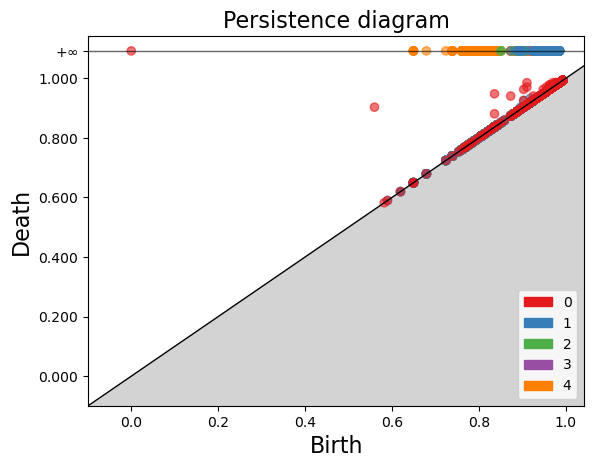

In [27]:
# Building normalized filtered clique complex for the food pages graph

# path_to_fb_pages_food_csv = './datasets/fb-pages-food/fb-pages-food.edges'
path_to_fb_pages_food_csv = \
  'https://raw.githubusercontent.com/ben300694/jupyter-TDA/main/datasets/fb-pages-food/fb-pages-food.edges'

fb_pages_food_normalized_st = simplex_graph_with_normalized_weight_rank_clique_filtration_from_csv(path_to_fb_pages_food_csv, 
                                                                                                   max_dim=4)

# for simplex in fb_pages_government_st.get_filtration():
#     print(simplex)

fb_pages_normalized_food_bar = fb_pages_food_normalized_st.persistence(min_persistence=-1.0, 
                                                                       persistence_dim_max=True)

# print(len(fb_pages_government_bar))
# for bar in fb_pages_government_bar:
#     print(bar)

gudhi.plot_persistence_diagram(fb_pages_normalized_food_bar, legend=True, max_intervals=0)

## Conclusion

We could now analyze the persistence diagrams further
and for example compare the food pages graph with say a politics graph.

Imported graph with 7057 nodes and 89455 edges.


/opt/conda/envs/testenv/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 534508 intervals given as input, whereas max_intervals is set to 500.
  warnings.warn(


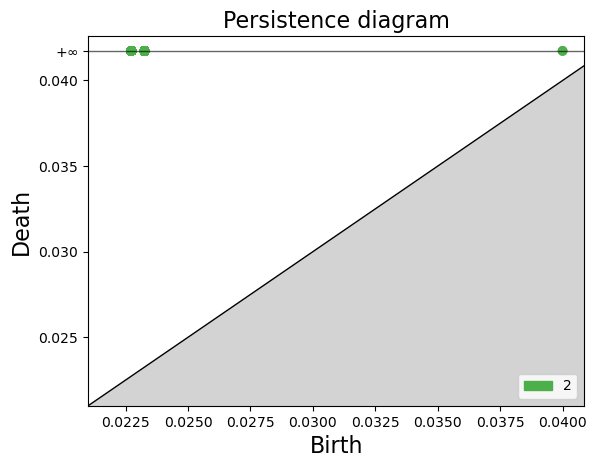

In [29]:
# fb-pages_food.edges is already imported above

# path_to_fb_pages_government_csv = './datasets/fb-pages-government/fb-pages-government.edges'
path_to_fb_pages_government_csv = \
  'https://raw.githubusercontent.com/ben300694/jupyter-TDA/main/datasets/fb-pages-government/fb-pages-government.edges'

fb_pages_government_st = simplex_graph_with_weight_rank_clique_filtration_from_csv(path_to_fb_pages_government_csv,
                                                                                   max_dim=2)

# for simplex in fb_pages_government_st.get_filtration():
#     print(simplex)


fb_pages_government_bar = fb_pages_government_st.persistence(min_persistence=-1.0, persistence_dim_max=True)

# print(len(fb_pages_government_bar))
# for bar in fb_pages_government_bar:
#     print(bar)

gudhi.plot_persistence_diagram(fb_pages_government_bar, legend=True, max_intervals=500)

##########

# Comparing different persistence diagrams using the bottleneck distance
# persistence_interval_dim_1_1 = fb_pages_food_st.persistence_intervals_in_dimension(1)
# persistence_interval_dim_1_2 = fb_pages_government_st.persistence_intervals_in_dimension(1)

# print(gudhi.bottleneck_distance(persistence_interval_dim_1_1,
#                                 persistence_interval_dim_1_2))


##########

# path_to_fb_pages_politician_csv = './datasets/fb-pages-politician/fb-pages-politician.edges'
path_to_fb_pages_politician_csv = \
  'https://raw.githubusercontent.com/ben300694/jupyter-TDA/main/datasets/fb-pages-politician/fb-pages-politician.edges'

### Properties of the data we could detect with persistent homology

 * Qualitative large scale features in the data
 * Measures both the global and local topology of a dataset
 * We can use the persistence data as input for further machine learning applications
 
### Drawbacks of using persistent homology

 * Have to deal with noise in the data and stability
 * For example, points close to the diagonal in the persistence diagram only appear for a short time: these could come from random fluctuations in the data, but could also represent local properties
 * It can be challanging to interpret the meaning of the persistent homology groups for the application

## References

 * An introduction to Topological Data Analysis: fundamental and practical aspects for data scientists: https://arxiv.org/abs/1710.04019
 * Bot Detection on Social Networks Using Persistent Homology: https://www.semanticscholar.org/paper/Bot-Detection-on-Social-Networks-Using-Persistent-Nguyen-Aktas/e3944fac408415965b3d24d52d3ac7b7a0e9aa17
 * Persistent Homology of Collaboration Networks: https://www.hindawi.com/journals/mpe/2013/815035/
 
 
 
### Python libraries used

#### TDA tools

 * [GUDHI Python module](https://gudhi.inria.fr/)
 * https://github.com/GUDHI/TDA-tutorial

#### Graphs

 * https://networkx.org/



### Datasets
 
 @inproceedings{nr,
      title = {The Network Data Repository with Interactive Graph Analytics and Visualization},
      author={Ryan A. Rossi and Nesreen K. Ahmed},
      booktitle = {AAAI},
      url={https://networkrepository.com},
      year={2015}
 }

### Appendix: Vietoris-Rips complex from Distance matrix

We will consider the following graph with 5 vertices where pairwise distances are encoded in the following matrix:

In [31]:
toy_matrix = [[0,1,1,2,inf],
              [1,0,2,1,inf],
              [1,2,0,1,inf],
              [2,1,1,0,inf],
              [inf,inf,inf,inf,0]]

<img src="https://github.com/ben300694/jupyter-TDA/blob/main/img/graph_distances.jpg?raw=1" width=400 title="Graph with unit length edges."/>

Vietoris-Rips filtration for $r \in \mathbb{R}_{\ge 0}$:
Insert a simplex for any finite set of vertices that has diameter at most $r$.

In [32]:
graph_distance_matrix = toy_matrix

# Build Vietoris-Rips complex

skeleton = gudhi.RipsComplex(
    distance_matrix = graph_distance_matrix,
    max_edge_length = 5.0
)

Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = 3)

for simplex in Rips_simplex_tree.get_filtration():
    print(simplex)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([0, 1], 1.0)
([0, 2], 1.0)
([1, 3], 1.0)
([2, 3], 1.0)
([1, 2], 2.0)
([0, 1, 2], 2.0)
([0, 3], 2.0)
([0, 1, 3], 2.0)
([0, 2, 3], 2.0)
([1, 2, 3], 2.0)
([0, 1, 2, 3], 2.0)


In [34]:
# Compute persistence of the simplex tree
BarCodes_Rips = Rips_simplex_tree.persistence(min_persistence=0.0, persistence_dim_max=True)

print(BarCodes_Rips)

[(1, (1.0, 2.0)), (0, (0.0, inf)), (0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

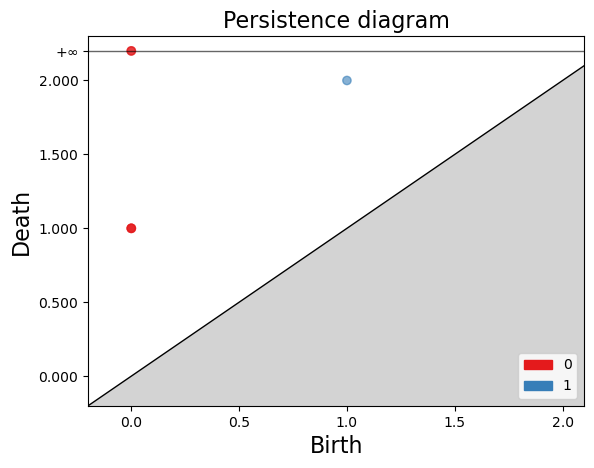

In [36]:
gudhi.plot_persistence_diagram(persistence=BarCodes_Rips, legend=True)

<Axes: title={'center': 'Persistence barcode'}>

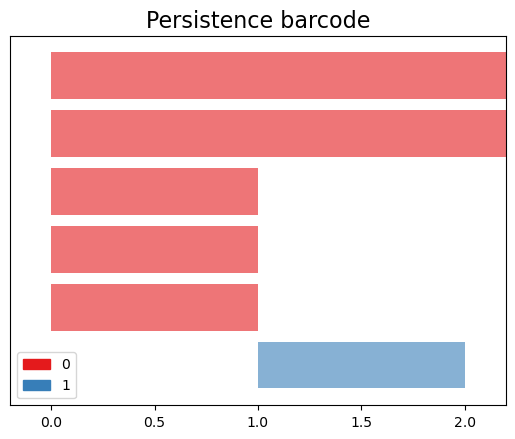

In [38]:
gudhi.plot_persistence_barcode(persistence=BarCodes_Rips, legend=True)